In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    brier_score_loss,
    roc_curve,
)
from sklearn.calibration import CalibratedClassifierCV

In [4]:
df = pd.read_csv('S05-hw-dataset.csv')
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [6]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [8]:
df.shape

(3000, 17)

In [12]:
df.isna().sum()

client_id                         0
age                               0
income                            0
years_employed                    0
credit_score                      0
debt_to_income                    0
num_credit_cards                  0
num_late_payments                 0
has_mortgage                      0
has_car_loan                      0
savings_balance                   0
checking_balance                  0
region_risk_score                 0
phone_calls_to_support_last_3m    0
active_loans                      0
customer_tenure_years             0
default                           0
dtype: int64

In [13]:
df['default'].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

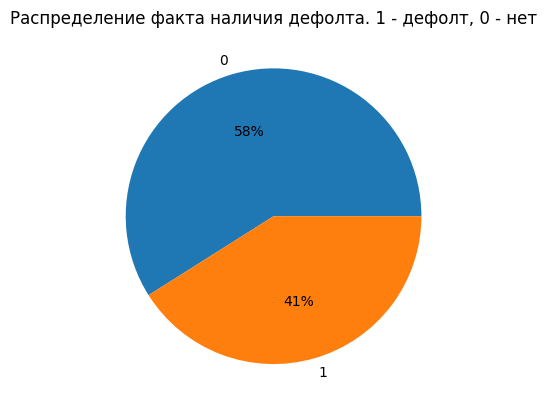

In [31]:
plt.plot()
plt.title('Распределение факта наличия дефолта. 1 - дефолт, 0 - нет')
plt.pie(df['default'].value_counts(normalize=True), autopct = '%d%%', labels = ['0', '1'])
plt.savefig('figures/pie_diagram')
plt.show()

In [15]:
print('======Проверка на неадекватные значения=====\n')
print(f"Age < 0: {np.where(df['age'] < 0)}\n")
print(f"Savings_balance < 0: {np.where(df['savings_balance'] < 0)}\n")
print(f"Years employed > 70: {np.where(df['years_employed'] < 0)}\n")
print(f"Age > 100: {np.where(df['age'] < 0)}\n")

======Проверка на неадекватные значения=====

Age < 0: (array([], dtype=int64),)

Savings_balance < 0: (array([], dtype=int64),)

Years employed > 70: (array([], dtype=int64),)

Age > 100: (array([], dtype=int64),)



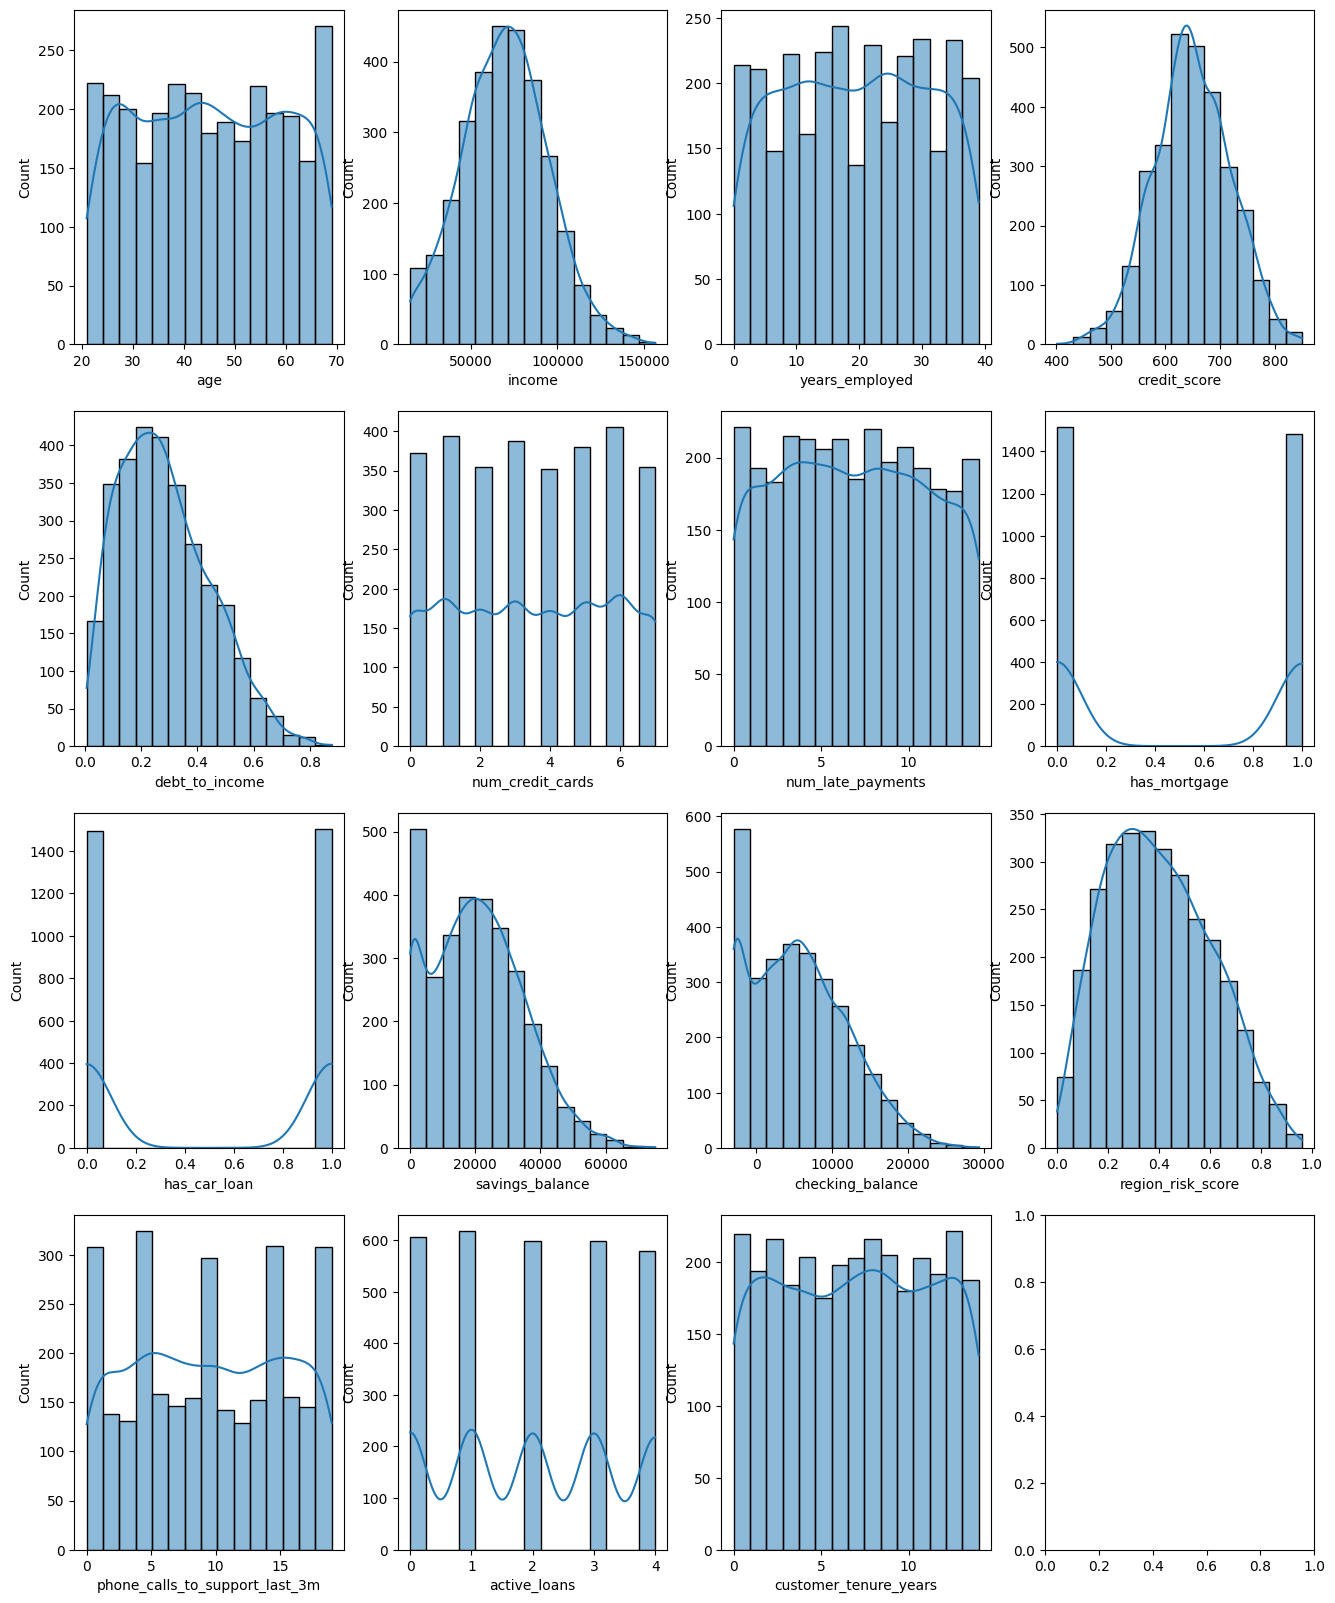

In [26]:
fig, ax = plt.subplots(4,4, figsize=(16,20))
ax = ax.ravel()
df_without_target_and_id = df.drop(['client_id','default'], axis=1)
for i, col in enumerate(df_without_target_and_id):
    sns.histplot(data=df, x=col, bins=15, ax=ax[i], kde=True)
plt.savefig('figures/distribution_of_features')
plt.show()

Таким образом, видно, что большинство данных, которые ,по моей гипотезе, важны для как можно более точных определений модели имеют что-то похожее даже на нормальное распределение(либо оно смещено влево/вправо). Однако, точно нельзя сказать исходя из данных графиков.
Я предполагаю, что наиболее важными признаками являются: income, credit_score, debt_to_income, region_risk_score, savings_balance, region_risk_score, checking_balance.

Для целевой переменной не наблюдается сильного дисбаланса классов.

В данных нет неадекватных значений(по типу возраст < 0 и тд).

В данных нет пропусков.

В датасете 16 колонок + целевая.

В датасете 3000 строк.


In [99]:
X = df.drop(['default', 'client_id'], axis=1)
y = df['default']

In [100]:
# 1. Отделяем тестовую выборку (например, 20% данных)
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,          # важно для классификации: сохраняем долю классов
    random_state=42,
)

# 2. Делим оставшиеся данные на train и validation (например, 60/20)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,      # 0.25 от X_temp = 0.25 * 0.8 = 0.2 от исходных
    stratify=y_temp,
    random_state=42,
)

print("Размеры выборок:")
print("  train:", X_train.shape)
print("  val:  ", X_val.shape)
print("  test: ", X_test.shape)

print("\nРаспределение классов (train):")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов (val):")
print(y_val.value_counts(normalize=True))

print("\nРаспределение классов (test):")
print(y_test.value_counts(normalize=True))

Размеры выборок:
  train: (1800, 15)
  val:   (600, 15)
  test:  (600, 15)

Распределение классов (train):
default
0    0.589444
1    0.410556
Name: proportion, dtype: float64

Распределение классов (val):
default
0    0.59
1    0.41
Name: proportion, dtype: float64

Распределение классов (test):
default
0    0.59
1    0.41
Name: proportion, dtype: float64


In [101]:
baseline = DummyClassifier(strategy="stratified", random_state=42)

# Обучаем только на train
baseline.fit(X_train, y_train)

# Оцениваем на validation
y_val_pred_baseline = baseline.predict(X_val)
y_val_proba_baseline = baseline.predict_proba(X_val)[:, 1]

print("=== Бейзлайн (DummyClassifier, stratified) – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_baseline))
print("Precision:", precision_score(y_val, y_val_pred_baseline, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_baseline, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_baseline, zero_division=0))

# Для ROC-AUC нам нужны вероятности положительного класса
try:
    print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_baseline))
except ValueError as e:
    print("Не удалось посчитать ROC-AUC для бейзлайна:", e)

=== Бейзлайн (DummyClassifier, stratified) – качество на validation ===
Accuracy : 0.5133333333333333
Precision: 0.4108527131782946
Recall   : 0.43089430894308944
F1-score : 0.42063492063492064
ROC-AUC  : 0.5007578889348215


In [102]:
log_reg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(C=1.0 , max_iter=1000, random_state=42))
])
log_reg_pipeline.fit(X_train, y_train)
y_val_pred = log_reg_pipeline.predict(X_val)
y_val_proba = log_reg_pipeline.predict_proba(X_val)[:, 1]

print("=== Логистическая регрессия (C=1.0) – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))

print("\nПодробный отчёт по классам (classification_report):")
print(classification_report(y_val, y_val_pred))

=== Логистическая регрессия (C=1.0) – качество на validation ===
Accuracy : 0.815
Precision: 0.8497409326424871
Recall   : 0.6666666666666666
F1-score : 0.7471526195899773
ROC-AUC  : 0.8746038307840706

Подробный отчёт по классам (classification_report):
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       354
           1       0.85      0.67      0.75       246

    accuracy                           0.81       600
   macro avg       0.82      0.79      0.80       600
weighted avg       0.82      0.81      0.81       600



In [103]:
param_grid = {"logreg__C" : [0.01, 0.1, 0.5, 1, 10, 100]}
grid_search = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    scoring="f1",
    cv=6,
    n_jobs=-1,
    verbose=1,
)
grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший F1 (по CV):", grid_search.best_score_)

Fitting 6 folds for each of 6 candidates, totalling 36 fits
Лучшие параметры: {'logreg__C': 10}
Лучший F1 (по CV): 0.7250517866218261


In [104]:
param_grid = {"logreg__C" : [0.01, 0.1, 0.5, 1, 10, 100]}
grid_search = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=6,
    n_jobs=-1,
    verbose=1,
)
grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший roc_auc (по CV):", grid_search.best_score_)

Fitting 6 folds for each of 6 candidates, totalling 36 fits
Лучшие параметры: {'logreg__C': 0.5}
Лучший roc_auc (по CV): 0.8534929721791297


In [105]:
param_grid = {"logreg__C" : [0.01, 0.1, 0.5, 1, 10, 100]}
grid_search = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    scoring="accuracy",
    cv=6,
    n_jobs=-1,
    verbose=1,
)
grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая accuracy (по CV):", grid_search.best_score_)

Fitting 6 folds for each of 6 candidates, totalling 36 fits
Лучшие параметры: {'logreg__C': 10}
Лучшая accuracy (по CV): 0.7833333333333332


In [106]:
best_model = grid_search.best_estimator_

# Оцениваем на validation
y_val_pred_best = best_model.predict(X_val)
y_val_proba_best = best_model.predict_proba(X_val)[:, 1]

print("=== Лучшая модель – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_best))
print("Precision:", precision_score(y_val, y_val_pred_best, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_best, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_best, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_best))

# Оцениваем на test для лучшей модели
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

print("\n=== Лучшая модель – качество на test ===")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_test_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_test_proba))

print("\nClassification report (test):")
print(classification_report(y_test, y_test_pred))

=== Лучшая модель – качество на validation ===
Accuracy : 0.8166666666666667
Precision: 0.8505154639175257
Recall   : 0.6707317073170732
F1-score : 0.75
ROC-AUC  : 0.8746382802811079

=== Лучшая модель – качество на test ===
Accuracy : 0.805
Precision: 0.8056872037914692
Recall   : 0.6910569105691057
F1-score : 0.7439824945295405
ROC-AUC  : 0.8748564604290111

Classification report (test):
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       354
           1       0.81      0.69      0.74       246

    accuracy                           0.81       600
   macro avg       0.81      0.79      0.79       600
weighted avg       0.81      0.81      0.80       600



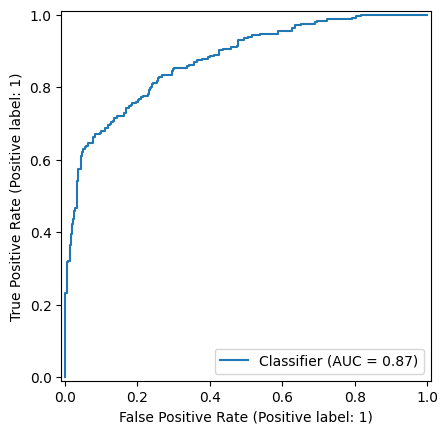

In [108]:
RocCurveDisplay.from_predictions(
    y_val,
    y_val_proba,
)
plt.savefig('figures/roc_auc_curve')

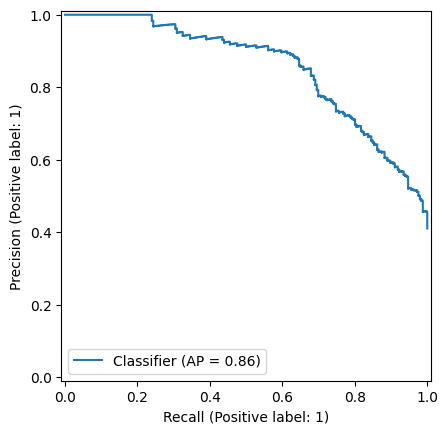

In [79]:
PrecisionRecallDisplay.from_predictions(
    y_val,
    y_val_proba,
)
plt.savefig('figures/pr_curve')

In [109]:
base_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(C=0.1 , max_iter=1000, random_state=42))
])
base_clf.fit(X_train, y_train)
y_val_proba_base = base_clf.predict_proba(X_val)[:, 1]
brier_before = brier_score_loss(y_val, y_val_proba_base)
print("Brier score до калибровки:", brier_before)
calibrated_clf = CalibratedClassifierCV(
    estimator=base_clf,
    method="sigmoid",  
    cv=6,
)
calibrated_clf.fit(X_train, y_train)
y_val_proba_cal = calibrated_clf.predict_proba(X_val)[:, 1]
brier_after = brier_score_loss(y_val, y_val_proba_cal)
print("Brier score после калибровки:", brier_after)#совсем немного различаются

Brier score до калибровки: 0.1387133216907319
Brier score после калибровки: 0.1385947863098013


In [110]:
df_dummy_vs_logreg = pd.DataFrame(index=['DummyClassifier', 'Log_reg'])
df_dummy_vs_logreg['accuracy'] = [accuracy_score(y_val, y_val_pred_baseline), accuracy_score(y_test, y_test_pred)]
df_dummy_vs_logreg['f1_score'] = [f1_score(y_val, y_val_pred_baseline), f1_score(y_test, y_test_pred)]
df_dummy_vs_logreg['precision'] = [precision_score(y_val, y_val_pred_baseline), precision_score(y_test, y_test_pred)]
df_dummy_vs_logreg['recall'] = [recall_score(y_val, y_val_pred_baseline), recall_score(y_test, y_test_pred)]
df_dummy_vs_logreg['roc_auc'] = [roc_auc_score(y_val, y_val_pred_baseline), roc_auc_score(y_test, y_test_pred)]

df_dummy_vs_logreg.to_csv('artifacts/данные.csv')

print(f'Сравнение с бейзлайном\n\n {df_dummy_vs_logreg}')

Сравнение с бейзлайном

                  accuracy  f1_score  precision    recall   roc_auc
DummyClassifier  0.513333  0.420635   0.410853  0.430894  0.500758
Log_reg          0.805000  0.743982   0.805687  0.691057  0.787619


Таким образом, проведя эксперимент, мы добились:

Повышения ROC_AUC на 28%

Повышения accuracy на 29%

При увеличении регуляризации(уменьшении параметра c) модель прроще, но у нас ниже все метрики.

Бейзлан отличается от логистической тем, что для него не подбирались гиперпараметры, соответственно повысить метрики у него нам и не нужно было.

Поскольку задача заключалась в том, чтобы предсказать на основе данных о клиенте банка, будет дефолт по кредиту или нет, модель логистичексой регрессии хорошо подошла для нашего набора данных и поставленной задачи. 

Калибровка вероятноестей не сильно изменила точность вероятностей, поскольку модель логистической регрессии итак достаточно хорошо калибрована.